In [1]:
import re
import os
if not 'id_0123456789876543210' in locals():
    _rootlevel = 1
    _oldwd = re.sub(r'\\', '/', os.getcwd())
    _spdirs = _oldwd.split('/')
    _newwd = '/'.join(_spdirs[:(len(_spdirs)-_rootlevel)])
    os.chdir(_newwd)
    id_0123456789876543210 = None

In [2]:
from src.python.model import classification_model, validate_classification_model_hparams

from src.python.training.validation import Foldify, Memory, eval_model, make_grid

from src.python.util import load_object, save_object

import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')


In [3]:
data = load_object('data/covid/classification/datasets/graves_train-1.1.pkl')


foldify = Foldify(len(data['x']),
                  nfolds=6,
                  val_prop=0.2,
                  ftype='random',
                  sorted=True,
                  seed=555,
                  weight=data['sample'],
                  label=data['label'],
                  datasets=(data['x'], data['y']))

memory = Memory(load_object(
    'data/covid/classification/gridsearch/memory_graves-1.0.pkl'))

output_file = 'data/covid/classification/gridsearch/output.pkl'
origin = 'dell inspiron'

grid = make_grid(hparams=dict(input_dim=10,
                              neurons=[16, 32, 64, 96, 128],
                              deep=[2, 3, 4],
                              optimizer='Adam',
                              learning_rate=[0.0001, 0.001, 0.01],
                              activation='relu',
                              initializer='uniform',
                              batch_size=[16, 32, 64],
                              epochs=[5, 10, 15, 20, 25],
                              batch_normalization=False,
                              regularization='None',
                              dropout=False),
                 validation=validate_classification_model_hparams)

for hparam in grid:
    eval_model(model=classification_model,
               hparam=hparam,
               foldify=foldify,
               memory=memory,
               output_file=output_file,
               origin=origin)

Hyperparameters:
	 input_dim: 10   neurons: 16   deep: 2   optimizer: Adam   learning_rate: 0.0001   activation: relu   initializer: uniform   batch_size: 16   epochs: 5   batch_normalization: False   regularization: None   dropout: False   regularization_factor: 0.0   dropout_rate: 0.0
Fold 1/6 ...
	 	time: 0h 0m 9s   loss: 0.031851   mae: 0.147316   val_loss: 0.027440   val_mae: 0.137132
Fold 2/6 ...
	 	time: 0h 0m 9s   loss: 0.025892   mae: 0.131342   val_loss: 0.023037   val_mae: 0.124266
Fold 3/6 ...
	 	time: 0h 0m 9s   loss: 0.028506   mae: 0.138310   val_loss: 0.024791   val_mae: 0.129884
Fold 4/6 ...
	 	time: 0h 0m 10s   loss: 0.026609   mae: 0.133237   val_loss: 0.023010   val_mae: 0.123557
Fold 5/6 ...
	 	time: 0h 0m 10s   loss: 0.031123   mae: 0.144745   val_loss: 0.026830   val_mae: 0.135287
Fold 6/6 ...
	 	time: 0h 0m 11s   loss: 0.031539   mae: 0.145510   val_loss: 0.028043   val_mae: 0.137325
Total:
	 	time: 0h 1m 1s   loss: 0.029253   mae: 0.140077   val_loss: 0.025525 

------------------

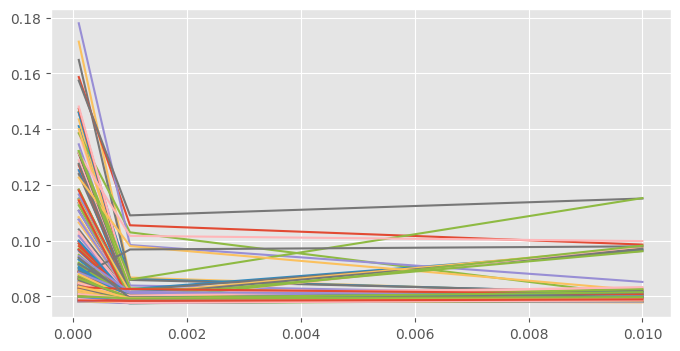

In [5]:
col = 'learning_rate'
groups = memory.groups(col, 'val_mae')

plt.figure(figsize=(8, 4))
for subdata in groups.subdata:
    plt.plot(subdata[col], subdata['val_mae'])
plt.show()

In [ ]:
hparams = dict(input_dim=10,
               neurons=[16, 32, 64],
               deep=[2, 3, 4],
               optimizer=['Adam', 'RMSprop', 'Nadam', 'SGD'],
               learning_rate=[0.0001, 0.001, 0.01],
               activation=['relu', 'elu', 'LeakyReLU'],
               initializer=['uniform', 'normal'],
               batch_size=[16, 32, 64],
               epochs=[5, 10, 15],
               batch_normalization=[False, True],
               regularization=['None', 'l1', 'l2'],
               regularization_factor=[0.001, 0.01, 0.1],
               dropout=[False, True],
               dropout_rate=[0.1, 0.3, 0.5])

hparams = dict(input_dim=10,
               neurons=[16, 32, 64, 96],
               deep=[2, 3, 4],
               optimizer=['Adam', 'RMSprop', 'Nadam', 'SGD'],
               learning_rate=[0.0001, 0.001, 0.01],
               activation=['relu', 'elu', 'LeakyReLU'],
               initializer=['uniform', 'normal'],
               batch_size=[16, 32, 64],
               epochs=[5, 10, 15, 20],
               batch_normalization=False,
               regularization='None',
               dropout=False)

--------------------------------